## Observations and Insights 

In [87]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# print(study_results.head())
# print(mouse_metadata.head())

# Combine the data into a single dataset
merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID",how="left")
merge_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [88]:
# Checking the number of mice.
unique = merge_df['Mouse ID'].unique()
print(len(unique))

249


In [89]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups_df = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
dups = dups_df['Mouse ID'].unique()
dups


array(['g989'], dtype=object)

In [90]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_df.loc[merge_df['Mouse ID'] == 'g989']


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [91]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df['Mouse ID'] != 'g989']
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [92]:
# Checking the number of mice in the clean DataFrame.
unique = clean_df['Mouse ID'].unique()
print(len(unique))

248


## Summary Statistics

In [113]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
import numpy as np

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

group_df = clean_df.groupby('Drug Regimen')

mean = group_df['Tumor Volume (mm3)'].mean()
median = group_df['Tumor Volume (mm3)'].median()
variance = group_df['Tumor Volume (mm3)'].var()
standard_deviation = group_df['Tumor Volume (mm3)'].std()
SEM  = group_df['Tumor Volume (mm3)'].sem()

summary_tumor_vol_df = pd.DataFrame({
    'Mean Tumor Volume':mean,
    'Median Tumor Volume':median,
    'Tumor Volume Variance':variance,
    'Tumor Volume Std. Dev.':standard_deviation,
    'Tumor Volume Std. Err.':SEM
})
summary_tumor_vol_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [115]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
group_df['Tumor Volume (mm3)'].agg(['mean', 'median','var', 'std', 'sem'])
# Using the aggregation method, produce the same summary statistics in a single line


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

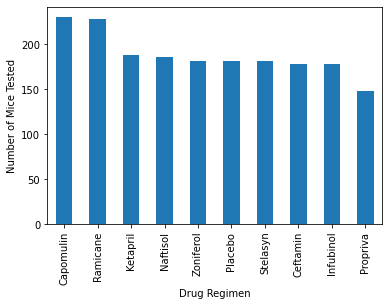

In [190]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
count_df = group_df.count().reset_index()
regimen_mouse_id_df = count_df[['Drug Regimen', 'Mouse ID']]
sorted_df = regimen_mouse_id_df.sort_values('Mouse ID', ascending = False)
plot_df = sorted_df.plot(kind="bar", legend= False)
plot_df.set_xticklabels(sorted_df["Drug Regimen"])
plot_df.set_xlabel("Drug Regimen")
plot_df.set_ylabel("Number of Mice Tested")
plot_df

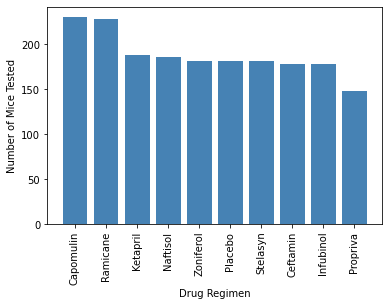

In [189]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
import matplotlib.pyplot as plt
import numpy as np

count_df = group_df['Mouse ID'].count().reset_index() #Note the column doesn't matter here
drugs_tested = sorted_df['Drug Regimen']
num_measurements = sorted_df['Mouse ID']

x_axis = np.arange(len(drugs_tested))
plt.bar(x_axis, num_measurements, color='steelblue', align="center")
plt.ylabel("Number of Mice Tested")
plt.xlabel("Drug Regimen")
plt.xticks(x_axis, drugs_tested, rotation=90)
plt.show()


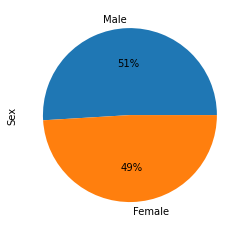

In [220]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
group_df = clean_df.groupby('Sex').count()
# group_df
sorted_df = group_df.sort_values('Mouse ID', ascending = False)
sex_df = sorted_df[['Mouse ID']]
sex_df = sex_df.rename(columns={"Mouse ID":"Sex"})
sex_df
plot_df = sex_df.plot(kind="pie", 
                      y='Sex', 
                      legend= False, 
                      subplots=True,
                      autopct='%1.0f%%')

Text(0, 0.5, 'Sex')

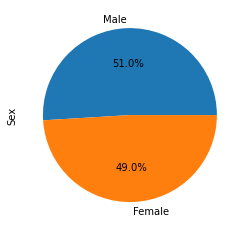

In [227]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt
import numpy as np

sex_df
labels = sex_df.index
values = sex_df['Sex']
labels
values
plt.pie(values,
        labels=labels,
        autopct="%1.1f%%",
        
       )
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [230]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
